In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("datasets/dataset_wisc_sd.csv")
X = df.drop(columns = ["id", "diagnosis"])
y = df.diagnosis.values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("datasets/dataset_wisc_sd.csv")
df.shape

(569, 32)

In [3]:
df[["id", "diagnosis", "radius_mean", "texture_mean", "concave points_worst"]].head()


,id,diagnosis,radius_mean,texture_mean,concave points_worst
0,842302,M,17.99,10.38,0.2654
1,842517,M,20.57,17.77,0.186
2,84300903,M,19.69,21.25,0.243
3,84348301,M,11.42,20.38,0.2575
4,84358402,M,20.29,14.34,0.1625


In [4]:
df[["id", "diagnosis", "radius_mean", "texture_mean",
"perimeter_mean", "area_mean", "concave points_worst"]].describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean
count,5.690000e+02,569.000000,569.000000,569.000000,567.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,655.657848
std,1.250206e+08,3.524049,4.301036,24.298981,352.288768
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.700000
75%,8.813129e+06,15.780000,21.800000,104.100000,785.600000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000


In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df['concave points_worst'] = df['concave points_worst'].astype(float)

ValueError: could not convert string to float: '0.1865\\n\\n'

In [7]:
df[df['concave points_worst'].str.contains(r"\\n")]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
146,869691,M,11.8,16.58,78.99,432.0,0.1091,0.17,0.1659,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.4504,0.1865\n\n,0.5774,0.103


In [8]:
df["concave points_worst"].iloc[146]

'0.1865\\n\\n'

In [9]:
df = df.replace(r'\\n','', regex=True)

In [10]:
df["concave points_worst"].iloc[146]

'0.1865'

In [11]:
df.isna().values.sum()

7

In [12]:
df = df.dropna()

In [13]:
df['diagnosis'].value_counts()


B    354
M    208
Name: diagnosis, dtype: int64


Bad key text.latex.preview in file /home/beste/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/beste/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/beste/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality p

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

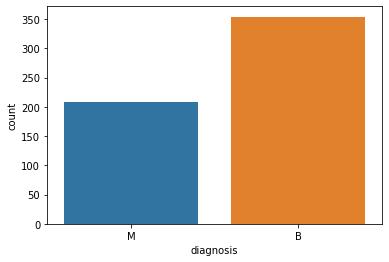

In [14]:
import seaborn as sns
sns.countplot(df['diagnosis'])

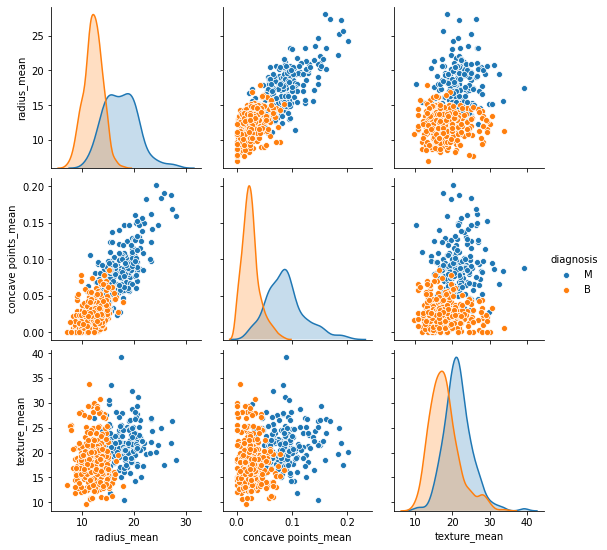

In [15]:
sns.pairplot(df[["diagnosis", "radius_mean", "concave points_mean", "texture_mean"]], hue = 'diagnosis')
                 

In [16]:
dfm = df[df["diagnosis"] == "M"]
Q1 = dfm['radius_mean'].quantile(0.25)
Q3 = dfm['radius_mean'].quantile(0.75)
IQR = Q3 - Q1

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

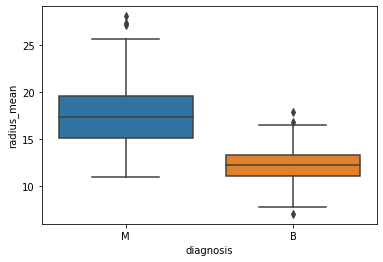

In [17]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)

In [18]:
df = df.query('(@Q1 - 1.5 * @IQR) <= radius_mean <= (@Q3 + 1.5* @IQR)')


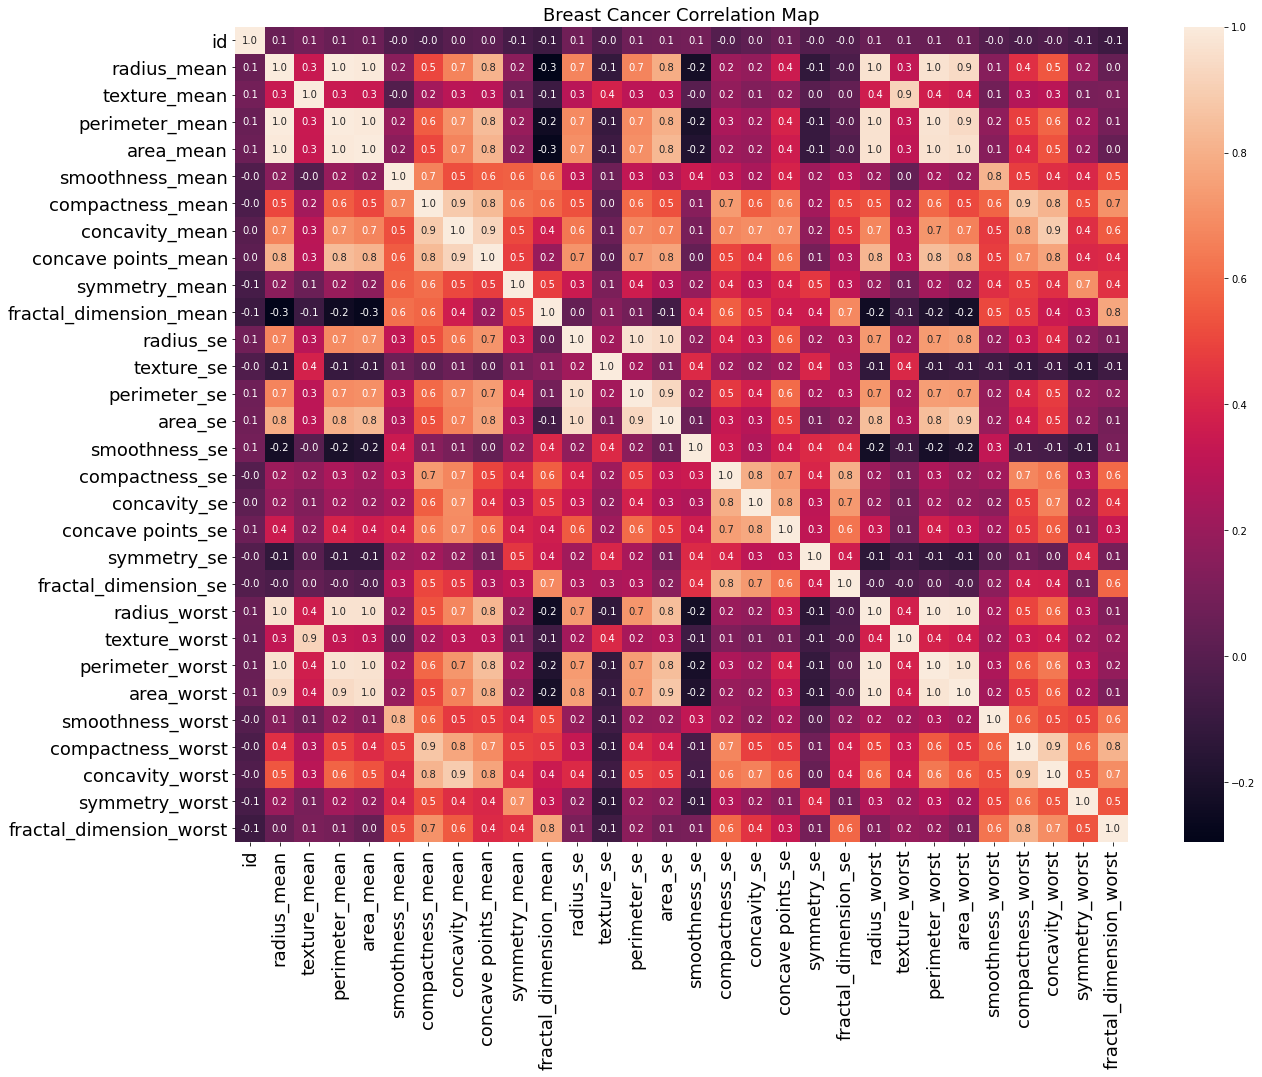

In [19]:
import matplotlib.pyplot as plt
f, ax=plt.subplots( figsize = (20,15))
sns.heatmap(df.corr(), annot= True, fmt = ".1f", ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Breast Cancer Correlation Map', fontsize=18)
plt.show()

In [20]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
k=1).astype(np.bool))
to_drop = [column for column in upper.columns if
any(upper[column] > 0.90)]

/home/beste/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df.drop(to_drop, axis=1, inplace=True)


In [22]:
X = df.drop(columns = ["id", "diagnosis"])
y = df.diagnosis.values

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns
= X.columns)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=40)

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [26]:
gnb_clf = GaussianNB()

In [27]:
gnb_clf.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
gnb_pred = gnb_clf.predict(X_test)
print(accuracy_score(gnb_pred, y_test))
0.95035

0.9064748201438849


0.95035

In [29]:
from sklearn.metrics import classification_report
print(classification_report(gnb_pred, y_test))


              precision    recall  f1-score   support

           B       0.92      0.93      0.92        83
           M       0.89      0.88      0.88        56

    accuracy                           0.91       139
   macro avg       0.90      0.90      0.90       139
weighted avg       0.91      0.91      0.91       139



In [30]:
import pickle
pickle.dump(gnb_clf, open("models/gnb_clf.pickle", 'wb'))

In [31]:
loaded_gnb_clf = pickle.load(open("models/gnb_clf.pickle", 'rb'))
loaded_gnb_clf.score(X_test, y_test)

0.9064748201438849

In [32]:
#UL

In [33]:
df = pd.read_csv("datasets/dataset_wisc_sd.csv")
print(df.shape)

(569, 32)


In [34]:
df = df.replace(r'\\n','', regex=True)
df = df.dropna()
print(df.shape)

(562, 32)


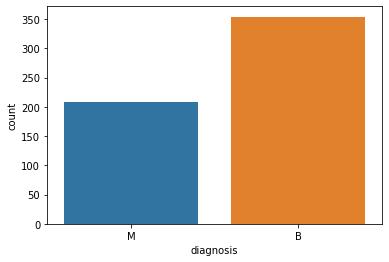

In [35]:
import seaborn as sns
sns.countplot(df['diagnosis']);

In [36]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [37]:
select_feats = ["diagnosis", "radius_mean", "texture_mean",
"smoothness_mean"]

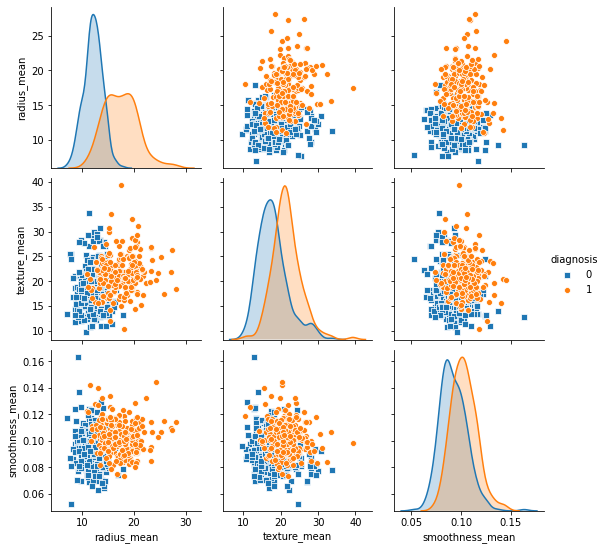

In [38]:
sns.pairplot(df[select_feats], hue = 'diagnosis', markers=["s","o"])

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

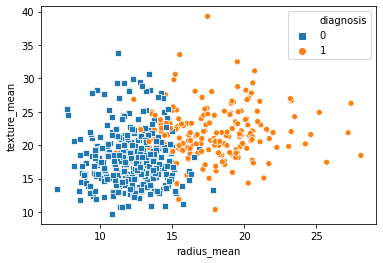

In [39]:
sns.scatterplot(x="radius_mean", y="texture_mean",
hue="diagnosis", style='diagnosis', data=df, markers=["s","o"])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X = df.drop(columns = ["id", "diagnosis"])
y = df.diagnosis.values
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns =
X.columns)

In [42]:
#Agglomerative clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2,
linkage="ward")

In [44]:
agc_featAll_pred = agc.fit_predict(X_scaled.iloc[:, :2])

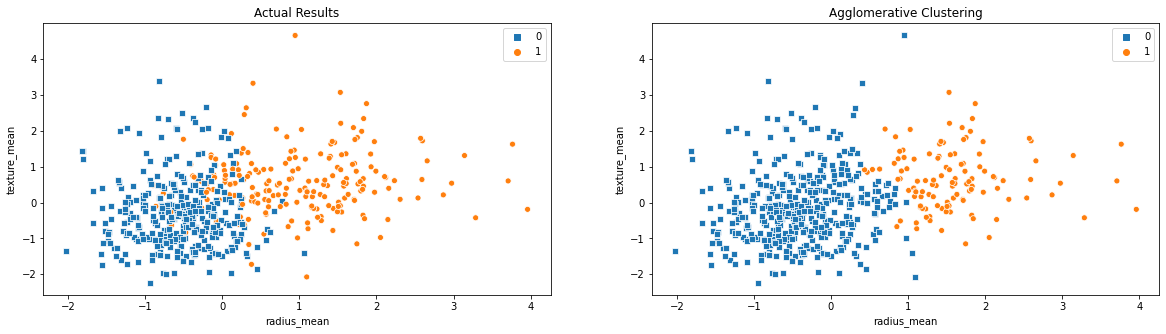

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")
plt.subplot(122)
plt.title("Agglomerative Clustering")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=agc_featAll_pred, style=agc_featAll_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, agc_featAll_pred))



0.8327402135231317


In [47]:
#KMeans

In [48]:
from sklearn.cluster import KMeans

In [49]:
kmc = KMeans(n_clusters=2, n_init=10, init="k-means++")

In [50]:
kmc_feat2_pred = kmc.fit_predict(X_scaled.iloc[:, :2])

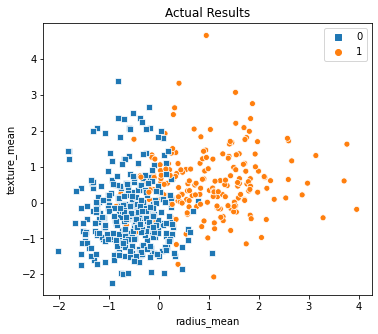

In [51]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

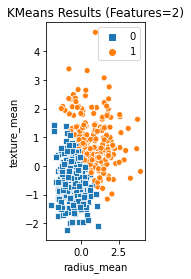

In [52]:
plt.subplot(132)
plt.title("KMeans Results (Features=2)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue= kmc_feat2_pred , style= kmc_feat2_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [53]:
kmc_feat2_pred=kmc.fit_predict(X_scaled.iloc[:, :2])
kmc_feat3_pred=kmc.fit_predict(X_scaled.iloc[:, :3])
kmc_feat4_pred=kmc.fit_predict(X_scaled.iloc[:, :4])
kmc_featall_pred=kmc.fit_predict(X_scaled.iloc[:, :])

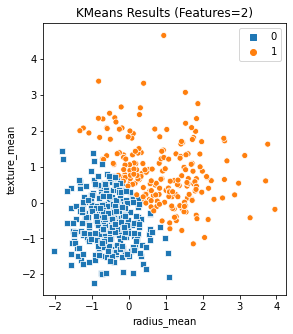

In [54]:
plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.title("KMeans Results (Features=2)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=kmc_feat2_pred, style=kmc_feat2_pred, data=X_scaled,
markers=["s", "o"])
ax.legend(loc="upper right")
# Apply the same for the other plots

In [55]:
#GMMs

In [56]:
from sklearn.mixture import GaussianMixture

In [57]:
gmm = GaussianMixture(n_components=2, covariance_type="full")


In [58]:
gmm_featAll_pred = 1-gmm.fit_predict(X_scaled.iloc[:,:2])

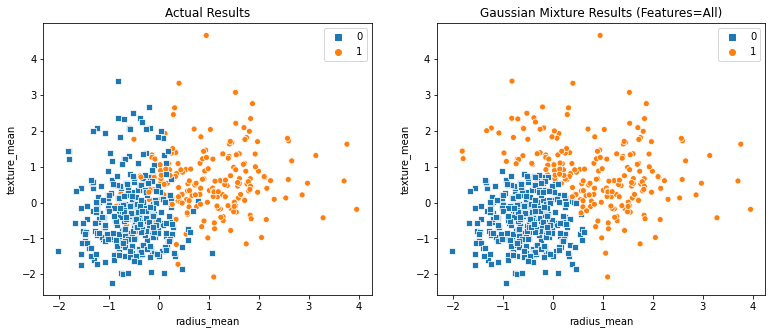

In [59]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")
plt.subplot(132)
plt.title("Gaussian Mixture Results (Features=All)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean",
hue=gmm_featAll_pred, style=gmm_featAll_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [60]:
#DR PCA

In [61]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2, svd_solver='full')
pca_2d.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [62]:
data_pca_2d = pca_2d.fit_transform(X_scaled)

<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

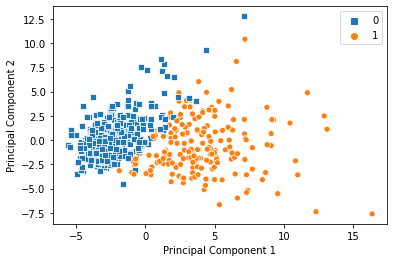

In [63]:
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
sns.scatterplot(x=data_pca_2d[:,0], y=data_pca_2d[:,1],
hue=y, style=y, markers=["s", "o"])

In [64]:
#26

In [65]:
dfx = pd.read_csv("datasets/single_cell_rna/nestorowa_corrected_log2_transformed_counts.txt", sep=' ', )
dfx.shape

(1645, 3991)

In [66]:
dfy = pd.DataFrame()
dfy['annotation'] = dfx.index.str[:4]
dfy['annotation'].value_counts()

Prog    791
HSPC    699
LT.H    155
Name: annotation, dtype: int64

In [67]:
from sklearn.decomposition import TruncatedSVD
svd_2d = TruncatedSVD(n_components=2, n_iter=7)

In [68]:
data_svd_2d = svd_2d.fit_transform(dfx)


<AxesSubplot:>

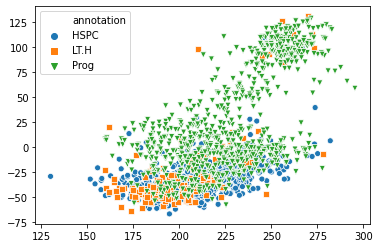

In [69]:
sns.scatterplot(x=data_svd_2d[:,0], y=data_svd_2d[:,1],
hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])

In [70]:
#t-SNE

In [71]:
from sklearn.manifold import TSNE
import seaborn as sns
data_tsne_2d_p10 = TSNE(n_components=2, perplexity=10.0).fit_transform(dfx)


<AxesSubplot:>

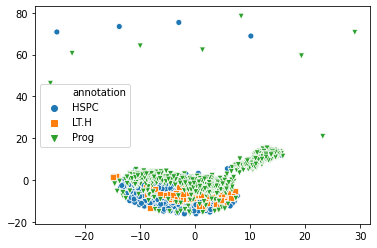

In [72]:
sns.scatterplot(x=data_tsne_2d_p10[:,0], y=data_tsne_2d_p10[:,1], hue=dfy.annotation, style=dfy.annotation, markers =["o", "s", "v"])

<AxesSubplot:>

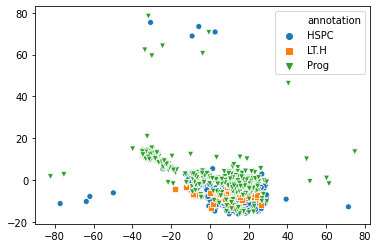

In [73]:
data_tsne_2d_p1 = TSNE(n_components=2, perplexity=1.0).fit_transform(dfx)
sns.scatterplot(x=data_tsne_2d_p1[:,0], y=data_tsne_2d_p10[:,1], hue=dfy.annotation, style=dfy.annotation, markers =["o", "s", "v"])

<AxesSubplot:>

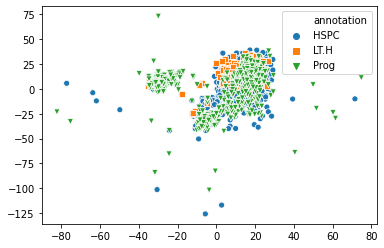

In [74]:
data_tsne_2d_p10 = TSNE(n_components=2, perplexity=10.0).fit_transform(dfx)
sns.scatterplot(x=data_tsne_2d_p1[:,0], y=data_tsne_2d_p10[:,1], hue=dfy.annotation, style=dfy.annotation, markers =["o", "s", "v"])

<AxesSubplot:>

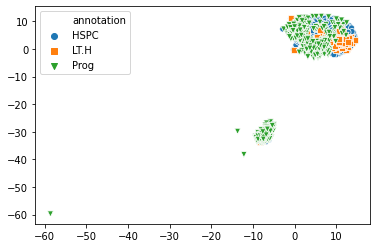

In [75]:
data_tsne_2d_p30 = TSNE(n_components=2, perplexity=30.0).fit_transform(dfx)
sns.scatterplot(x=data_tsne_2d_p30[:,0], y=data_tsne_2d_p30[:,1], hue=dfy.annotation, style=dfy.annotation, markers =["o", "s", "v"])

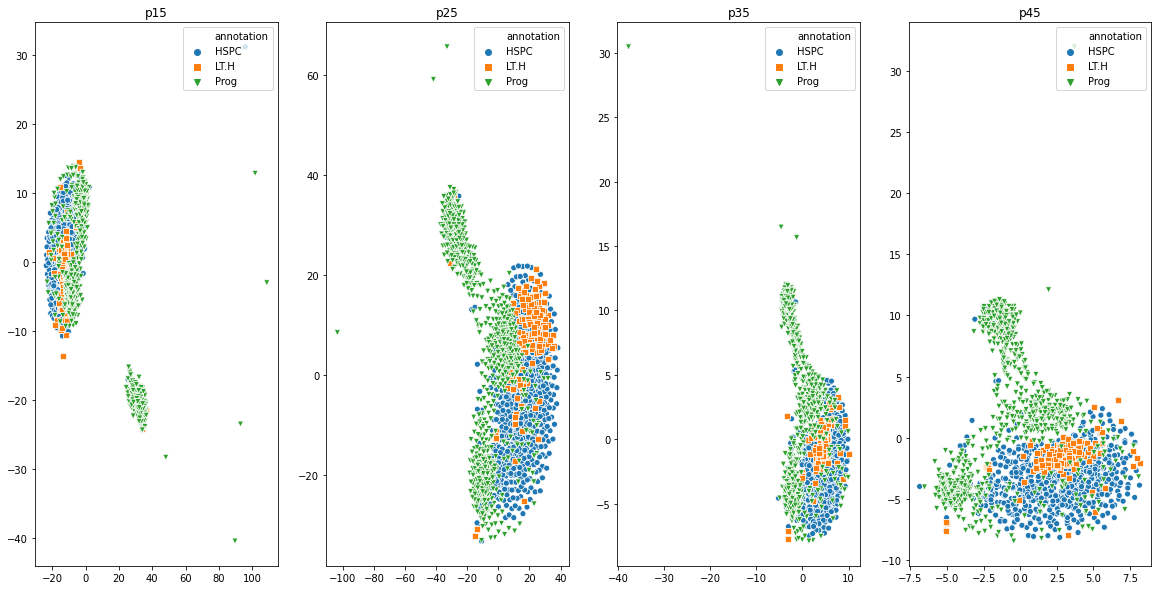

In [76]:
from sklearn.manifold import TSNE

data_tsne_2d_p15 = TSNE(n_components=2, perplexity= 15).fit_transform(dfx)
data_tsne_2d_p25 = TSNE(n_components=2, perplexity= 25).fit_transform(dfx)
data_tsne_2d_p35 = TSNE(n_components=2, perplexity= 35).fit_transform(dfx)
data_tsne_2d_p45 = TSNE(n_components=2, perplexity= 45).fit_transform(dfx)

plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title("p15")
ax= sns.scatterplot(x=data_tsne_2d_p15[:,0], y=data_tsne_2d_p15[:,1], hue= dfy.annotation, style= dfy.annotation, markers=["o", "s", "v"])
ax.legend(loc="upper right")


plt.subplot(142)
plt.title("p25")
ax=sns.scatterplot(x=data_tsne_2d_p25[:,0], y=data_tsne_2d_p25[:,1], hue=dfy.annotation, style= dfy.annotation, markers=["o","s","v"])
ax.legend(loc="upper right")


plt.subplot(143)
plt.title("p35")
ax= sns.scatterplot(x=data_tsne_2d_p35[:,0], y=data_tsne_2d_p35[:,1], hue=dfy.annotation, style= dfy.annotation, markers=["o", "s", "v"])
ax.legend(loc="upper right")

plt.subplot(144)
plt.title("p45")
ax= sns.scatterplot(x=data_tsne_2d_p45[:,0], y=data_tsne_2d_p45[:,1], hue=dfy.annotation, style= dfy.annotation, markers=["o", "s", "v"])
ax.legend(loc="upper right")




In [77]:
# UMAP

In [78]:
import umap
data_umap_2d_n5 = umap.UMAP(n_components=2, n_neighbors=5).fit_transform(dfx)
sns.scatterplot(x=data_umap_2d_n5[:,0], y=data_umap_2d_n5[:,1], 
                hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])

LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
[1m[1mStoring i64 to ptr of i32 ('dim'). FE type int32
[1m
File "../../../anaconda3/lib/python3.7/site-packages/umap/layouts.py", line 52:[0m
[1mdef rdist(x, y):
    <source elided>
    result = 0.0
[1m    dim = x.shape[0]
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: lowering "dim = static_getitem(value=$8load_attr.2, index=0, index_var=$const10.3, fn=<built-in function getitem>)" at /home/beste/anaconda3/lib/python3.7/site-packages/umap/layouts.py (52)[0m

In [ ]:
#SL

In [80]:
dfx = pd.read_csv("datasets/single_cell_rna/nestorowa_corrected_log2_transformed_counts.txt", sep=' ', )


In [81]:
dfx['annotation'] = dfx.index.str[:4]
y = dfx["annotation"].values.ravel()

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(dfx.drop(columns=["annotation"]))

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15, svd_solver='full')
pca.fit(X_scaler)
data_pca = pca.fit_transform(X_scaler)

In [84]:
pca = PCA(n_components=900, svd_solver='full')
pca.fit(X_scaler)
data_pca = pca.fit_transform(X_scaler)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_pca, y, test_size= 0.33)


In [86]:
#K-nearest Neighbors

In [87]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
y_pred = knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

        HSPC       0.81      0.35      0.48       220
        LT.H       0.43      0.07      0.12        45
        Prog       0.62      0.99      0.76       278

    accuracy                           0.65       543
   macro avg       0.62      0.47      0.45       543
weighted avg       0.68      0.65      0.60       543



In [89]:
from sklearn.metrics import accuracy_score
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    print("n=", i, "ac=", accuracy_score(Y_test, y_pred))

n= 1 ac= 0.580110497237569
n= 2 ac= 0.585635359116022
n= 3 ac= 0.6556169429097606
n= 4 ac= 0.6224677716390423
n= 5 ac= 0.6500920810313076
n= 6 ac= 0.6077348066298343
n= 7 ac= 0.6243093922651933
n= 8 ac= 0.6040515653775322
n= 9 ac= 0.6077348066298343


In [90]:
df = pd.read_csv("datasets/dataset_enrollment_sd.csv")
df

,Feature1,Feature2,enrollment_enc,enrollment_cat
0,80.697444,-34.832905,2,Very Likely
1,-53.423312,-22.736584,0,Unlikely
2,-50.639987,11.923637,0,Unlikely
3,-41.346903,-27.126203,1,Likely
4,-70.273574,7.487521,0,Unlikely
...,...,...,...,...
58,77.244307,-62.619328,2,Very Likely
59,50.582194,-74.472417,2,Very Likely
60,-11.742422,-45.934048,1,Likely
61,57.926851,-44.738880,2,Very Likely


In [91]:
dftmp = df[(df["enrollment_cat"] != "Likely")]
dftmp

,Feature1,Feature2,enrollment_enc,enrollment_cat
0,80.697444,-34.832905,2,Very Likely
1,-53.423312,-22.736584,0,Unlikely
2,-50.639987,11.923637,0,Unlikely
4,-70.273574,7.487521,0,Unlikely
6,82.608260,-70.108919,2,Very Likely
7,80.552882,-81.771964,2,Very Likely
8,-33.049175,-20.374304,0,Unlikely
9,55.178297,-73.080612,2,Very Likely
10,105.978798,-47.244207,2,Very Likely
11,39.310500,-53.547026,2,Very Likely


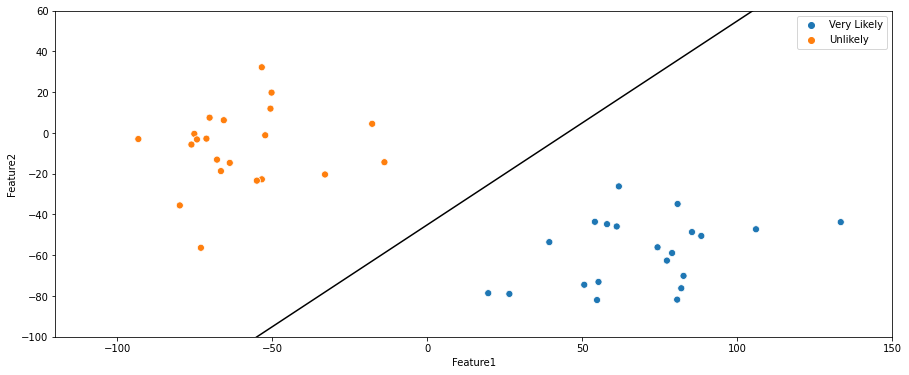

In [92]:
plt.figure(figsize=(15, 6))
xfit = np.linspace(-90, 130)
sns.scatterplot(dftmp["Feature1"], dftmp["Feature2"],
hue=dftmp["enrollment_cat"].values, s=50)
for m, b in [(1, -45),]:
 plt.plot(xfit, m * xfit + b, '-k')
 plt.xlim(-120, 150);
 plt.ylim(-100, 60);

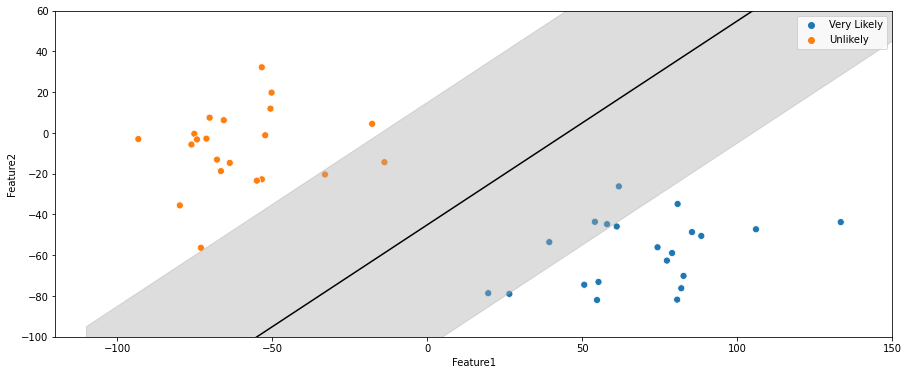

In [93]:
plt.figure(figsize=(15, 6))
xfit = np.linspace(-110, 180)
sns.scatterplot(dftmp["Feature1"],
dftmp["Feature2"],
hue=dftmp["enrollment_cat"].values,
s=50)
for m, b, d in [(1, -45, 60),]:
 yfit = m * xfit + b
 plt.plot(xfit, yfit, '-k')
 plt.fill_between(xfit, yfit - d,
 yfit + d, edgecolor='none',
 color='#AAAAAA', alpha=0.4)
 plt.xlim(-120, 150);
 plt.ylim(-100, 60);

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dftmp[["Feature1","Feature2"]],dftmp["enrollment_cat"].values,
test_size = 0.25)
from sklearn.svm import SVC
model = SVC (kernel='linear', C=1E10, random_state = 42)
model.fit(X_train, y_train)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [95]:
plt.figure(figsize=(15, 6))
sns.scatterplot(dftmp["Feature1"], dftmp["Feature2"], hue=dftmp["enrollment_cat"].values, s=50)
plot_svc_decision_function(model);
for j, k in model.support_vectors_:
 plt.plot([j], [k], lw=0,= 'o', color='red',markeredgewidth=2, markersize=20,fillstyle='none')

SyntaxError: invalid syntax (<ipython-input-95-bddbfc01040f>, line 5)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
#Decision trees

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title()
x1=fig.add_subplot

In [ ]:
#XGBoost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=10000)

In [ ]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
#20.09

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)